#Exercise




Predict bike rental count (daily) based on the environmental & seasonal settings. This dataset contains the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information. 




Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. 




Conduct the DNN analysis and improve the performance of the model using different archictecture. 




Columns Details:

1. Instant - Record Index

2. dteday - Date (Format: YYYY-MM-DD)

3. season - Season (1:   springer, 2: summer, 3: fall, 4: winter)

4. yr - Year (0: 2011,   1:2012)

5. mnth - Month (1 to 12)

6. holiday - Weather day is holiday or not

7. weekday - Day of the week

8. workingday - Working Day: If day is neither weekend nor holiday is 1, otherwise is 0

9. weathersit - Weather Situation (1: Clear/Few clouds; 2: Mist/Cloudy; 3: Light Snow/Light Rain; 4: Heavy Rain/Ice Pallets/Thunderstorm/Snow)

10. temp - Normalized temperature in Celsius. 

11. atemp - Normalized feeling temperature in Celsius. 

12. hum - Normalized humidity. 

13. windspeed - Normalized wind speed. 

14. casual - Count of casual users

15. registered - Count of registered users

16. cnt - Count of total rental bikes including both casual and registered

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras import initializers
from keras import regularizers

from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset

from google.colab import drive
drive.mount('/drive')

path = '/drive/MyDrive/apu-dl-datasets/bike.csv'


import pandas as pd

data = pd.read_csv(path)
data.head()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.head().T

,0,1,2,3,4
instant,1,2,3,4,5
dteday,1/1/2011,1/2/2011,1/3/2011,1/4/2011,1/5/2011
season,1,1,1,1,1
yr,0,0,0,0,0
mnth,1,1,1,1,1
holiday,0,0,0,0,0
weekday,6,0,1,2,3
workingday,0,0,1,1,1
weathersit,2,2,1,1,1
temp,0.344167,0.363478,0.196364,0.2,0.226957


In [4]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Get count of unique values for all columns in the dataframe
unique_counts = data.nunique()

# Print the count of unique values for all columns
print(unique_counts)

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64


In [7]:
# Drop instant and day

data = data.drop(['instant', 'dteday'], axis=1)

In [8]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [9]:
# Remember, split the target variable and feature variables
# X is target variable dataset
# Y is feature variables dataset

# Using cnt

Y = data['cnt']

X = data.drop('cnt', axis = 1)


In [10]:
# Then split the X,Y datasets into training and testing datasets (Totalling 4 datasets)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

# Print the datasets' dimension shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(511, 13) (220, 13) (511,) (220,)


In [11]:
# Number of neurals. No harm in changing the numbers, no guidelines here.
L1 = 100 # First hidden layer neurons
L2 = 100 # Second hidden layer neurons

# This means parameters in input model. In X_train, there are only 13 feature columns.
input = 13

# Activation functions
activation_function = 'relu'
activation_function2 = 'relu'
output_activation_function = 'linear' # Multi-class = softmax, Binary = sigmoid, continuous = * something linear *

# Number of outputs
# You need to know your columns, for example, you only made a column "Price", so here only one value.
no_of_output = 1

# Initialize object
model = Sequential()

# First hidden layer
model.add(Dense(L1, input_dim=input, activation=activation_function))

# Second hidden layer
model.add(Dense(L2, activation=activation_function2))

# Output layer
model.add(Dense(no_of_output, activation=output_activation_function))

In [12]:
# Configure the loss, metric and optimizers
# Please note that mae, mse, mape are same in lost and metric classes. You can invert and mix using them.
lost_class = 'mse'
metric_class = 'mae'
optimizer_class = 'rmsprop'

model.compile(loss = lost_class, metrics = [metric_class], optimizer = optimizer_class)

In [13]:
# Configure the number of iterations and sample size in each iterations
no_of_epoch = 100
sample_size = 200

history = model.fit(X_train, y_train, epochs = no_of_epoch, batch_size = sample_size, validation_data = (X_test, y_test))

Epoch 1/100
3/3 [==============================] - 5s 383ms/step - loss: 20185006.0000 - mae: 4128.2925 - val_loss: 14459748.0000 - val_mae: 3468.5449
Epoch 2/100
3/3 [==============================] - 0s 58ms/step - loss: 12294228.0000 - mae: 3220.1616 - val_loss: 9215962.0000 - val_mae: 2761.7134
Epoch 3/100
3/3 [==============================] - 0s 43ms/step - loss: 7765772.5000 - mae: 2552.5696 - val_loss: 5676260.5000 - val_mae: 2159.2839
Epoch 4/100
3/3 [==============================] - 0s 68ms/step - loss: 4637426.0000 - mae: 1964.3239 - val_loss: 3103408.7500 - val_mae: 1586.2850
Epoch 5/100
3/3 [==============================] - 0s 52ms/step - loss: 2466203.5000 - mae: 1418.5438 - val_loss: 1542899.0000 - val_mae: 1103.7235
Epoch 6/100
3/3 [==============================] - 0s 62ms/step - loss: 1184350.0000 - mae: 963.1413 - val_loss: 680900.1875 - val_mae: 712.2548
Epoch 7/100
3/3 [==============================] - 0s 63ms/step - loss: 499283.9688 - mae: 602.0829 - val_loss:

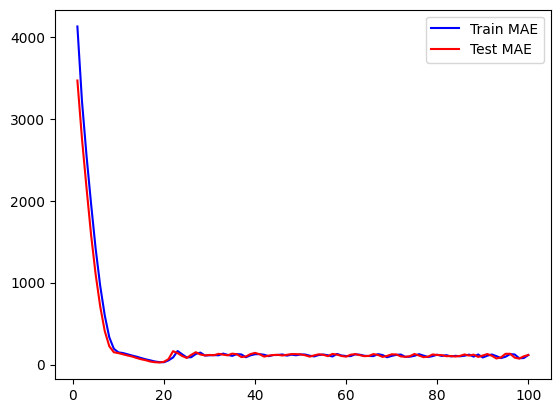

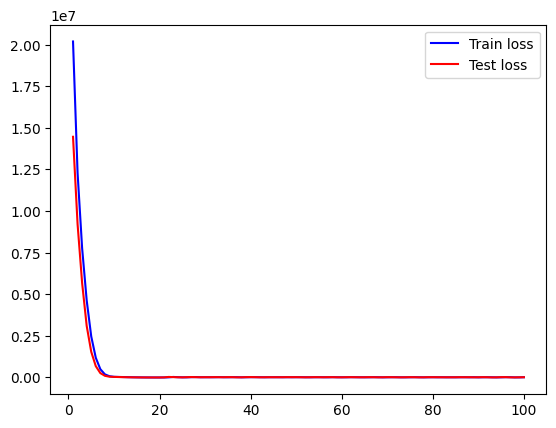

In [14]:
# Bring back the previous code and run. No changes in this part.
# Visualisations

import matplotlib.pyplot as plt

acc2 = history.history['mae']
val_acc = history.history['val_mae']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

# 'b' and 'r' are blue and red color

plt.plot(epochs, acc2, 'b', label='Train MAE')
plt.plot(epochs, val_acc, 'r', label='Test MAE')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train loss')
plt.plot(epochs, val_loss, 'r', label = 'Test loss')
plt.legend()
plt.show()

In [15]:
import numpy as pd

predict = model.predict(X_test)

print(predict)

7/7 [==============================] - 0s 3ms/step
[[5787.504  ]
 [4472.741  ]
 [1215.7833 ]
 [1333.7885 ]
 [3967.115  ]
 [1775.5618 ]
 [2596.775  ]
 [6075.9414 ]
 [6690.559  ]
 [1146.094  ]
 [1510.7325 ]
 [1138.6526 ]
 [1424.9963 ]
 [4708.524  ]
 [4225.445  ]
 [3899.9927 ]
 [7335.698  ]
 [6366.942  ]
 [3310.7607 ]
 [2017.0519 ]
 [7518.3604 ]
 [1315.5426 ]
 [5118.2197 ]
 [4344.6074 ]
 [1926.0521 ]
 [4407.7515 ]
 [3300.8442 ]
 [4932.7993 ]
 [7688.742  ]
 [7917.821  ]
 [ 800.02124]
 [4988.441  ]
 [6230.65   ]
 [5074.81   ]
 [2156.4255 ]
 [3905.3635 ]
 [6688.584  ]
 [4703.2944 ]
 [2675.606  ]
 [2861.4028 ]
 [6467.8286 ]
 [ 780.18896]
 [4720.7666 ]
 [3391.8218 ]
 [7389.459  ]
 [7248.5    ]
 [1902.2405 ]
 [3275.8867 ]
 [2762.6409 ]
 [1641.9888 ]
 [5899.978  ]
 [6780.9863 ]
 [5429.2515 ]
 [7227.398  ]
 [4452.5347 ]
 [2979.6523 ]
 [3527.5654 ]
 [7274.1016 ]
 [6925.6846 ]
 [3198.2776 ]
 [7079.86   ]
 [4207.391  ]
 [3971.9084 ]
 [8506.775  ]
 [7304.574  ]
 [1948.1456 ]
 [5070.3076 ]
 [5243.    